In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import mannwhitneyu

In [2]:
df = pd.read_csv('source/FReDA4.csv')

In [3]:
def collapse_kde_into_bins(kde_df, bins=[0, 1, 2, 3, 4, 5, 6]):
    df = kde_df.copy()
    N = df["N_total"].iloc[0]

    dx = df["x"].diff().median()

    df["bin"] = pd.cut(df["x"], bins=bins, labels=range(len(bins) - 1), right=False)

    out = (
        df.groupby("bin")
        .apply(lambda g: pd.Series({
            "density_sum": (g["density"] * dx).sum(),
        }))
        .reset_index()
    )
    return out

In [4]:
def val_to_category(val):
    if val <= 0.3:
        return 0
    elif 0.3 < val <= 1.5:
        return 1
    elif 1.5 < val <= 2.5:
        return 2
    elif 2.5 < val <= 3.5:
        return 3
    elif 3.5 < val <= 4.5:
        return 4
    elif 4.5 < val:
        return 5
    return None


In [5]:
df['Freq'] = df['Frequency'].apply(val_to_category)

In [6]:
hue_order = ["Alignment", "+1", "+2", "+3 or more"]
new_palette = [
    "#C4A000",
    "#355C9C",
    "#B76A8D",
    "#009688",
]

ft_size = 18
tt_size = 26

In [7]:
satisfied = df[df["Group3"] == "Couple Satisfaction"].copy()
mask = (
    satisfied.groupby('CoupleId')['Frequency']
    .nunique()
    .eq(1)
)

satisfied['TouchMatch'] = satisfied['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    satisfied.groupby("CoupleId")["Frequency"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
satisfied["TouchDiff"] = satisfied["CoupleId"].map(diffs)

In [8]:
mixed = df[df["Group3"] == "Couple Mixed"].copy()
mask = (
    mixed.groupby('CoupleId')['Frequency']
    .nunique()
    .eq(1)
)
mixed['TouchMatch'] = mixed['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    mixed.groupby("CoupleId")["Frequency"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
mixed["TouchDiff"] = mixed["CoupleId"].map(diffs)
mixed["Diff"] = mixed["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

In [9]:
deprived = df[df["Group2"] == "Couple Deprivation"].copy()

mask = (
    deprived.groupby('CoupleId')['Frequency']
    .nunique()
    .eq(1)
)
deprived['TouchMatch'] = deprived['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    deprived.groupby("CoupleId")["Frequency"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
deprived["TouchDiff"] = deprived["CoupleId"].map(diffs)
deprived["Diff"] = deprived["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

In [10]:
deprived_me = df[df["Group1"] == "SubGroup2"].copy()
mask = (
    deprived_me.groupby('CoupleId')['Frequency']
    .nunique()
    .eq(1)
)
deprived_me['TouchMatch'] = deprived_me['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    deprived_me.groupby("CoupleId")["Frequency"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
deprived_me["TouchDiff"] = deprived_me["CoupleId"].map(diffs)
deprived_me["Diff"] = deprived_me["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

In [11]:
saturated_one = df[df["Group2"] == "One-sided Saturation"].copy()
mask = (
    saturated_one.groupby('CoupleId')['Frequency']
    .nunique()
    .eq(1)
)
saturated_one['TouchMatch'] = saturated_one['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    saturated_one.groupby("CoupleId")["Frequency"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
saturated_one["TouchDiff"] = saturated_one["CoupleId"].map(diffs)
saturated_one["Diff"] = saturated_one["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

In [12]:
deprived_one = df[df["Group2"] == "One-sided Deprivation"].copy()
mask = (
    deprived_one.groupby('CoupleId')['Frequency']
    .nunique()
    .eq(1)
)
deprived_one['TouchMatch'] = deprived_one['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    deprived_one.groupby("CoupleId")["Frequency"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
deprived_one["TouchDiff"] = deprived_one["CoupleId"].map(diffs)
deprived_one["Diff"] = deprived_one["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

In [13]:
deprived_partner = df[df["Group1"] == "SubGroup7"].copy()
mask = (
    deprived_partner.groupby('CoupleId')['Frequency']
    .nunique()
    .eq(1)
)
deprived_partner['TouchMatch'] = deprived_partner['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    deprived_partner.groupby("CoupleId")["Frequency"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
deprived_partner["TouchDiff"] = deprived_partner["CoupleId"].map(diffs)
deprived_partner["Diff"] = deprived_partner["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

In [14]:
saturated = df[df["Group2"] == "Couple Saturation"].copy()
mask = (
    saturated.groupby('CoupleId')['Frequency']
    .nunique()
    .eq(1)
)
saturated['TouchMatch'] = saturated['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    saturated.groupby("CoupleId")["Frequency"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
saturated["TouchDiff"] = saturated["CoupleId"].map(diffs)
saturated["Diff"] = saturated["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

In [15]:
saturated_partner = df[df["Group1"] == "SubGroup8"].copy()
mask = (
    saturated_partner.groupby('CoupleId')['Frequency']
    .nunique()
    .eq(1)
)
saturated_partner['TouchMatch'] = saturated_partner['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    saturated_partner.groupby("CoupleId")["Frequency"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
saturated_partner["TouchDiff"] = saturated_partner["CoupleId"].map(diffs)
saturated_partner["Diff"] = saturated_partner["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

In [16]:
saturated_me = df[df["Group1"] == "SubGroup5"].copy()
mask = (
    saturated_me.groupby('CoupleId')['Frequency']
    .nunique()
    .eq(1)
)
saturated_me['TouchMatch'] = saturated_me['CoupleId'].map(
    lambda cid: 'Alignment' if mask.get(cid, False) else 'Disalignment'
)

diffs = (
    saturated_me.groupby("CoupleId")["Frequency"]
    .apply(lambda x: abs(np.diff(sorted(x)))[0])
)
saturated_me["TouchDiff"] = saturated_me["CoupleId"].map(diffs)
saturated_me["Diff"] = saturated_me["TouchDiff"].apply(
    lambda d: "Alignment" if d == 0 else ("+1" if d < 1 else ("+3 or more" if d >= 3 else f"+{int(d)}"))
)

In [17]:
# touchmatch_counts = (
#     satisfied.drop_duplicates("CoupleId")["Diff"]
#     .value_counts()
#     .sort_index()
# )
# print(touchmatch_counts)

In [18]:
bw = 1.15

In [19]:
target = satisfied
target['TouchDiff'] = target['TouchDiff'].apply(val_to_category)
conditions = {
    "0 or more": target[target['TouchDiff'] >= 0],
    "exactly 0": target[target['TouchDiff'] == 0],
    "1 or more": target[target['TouchDiff'] >= 1],
    "2 or more": target[target['TouchDiff'] >= 2],
    "3 or more": target[target['TouchDiff'] >= 3],
}
for i, (label, subset) in enumerate(conditions.items()):
    print(subset.shape)

(3842, 52)
(706, 52)
(3136, 52)
(674, 52)
(120, 52)


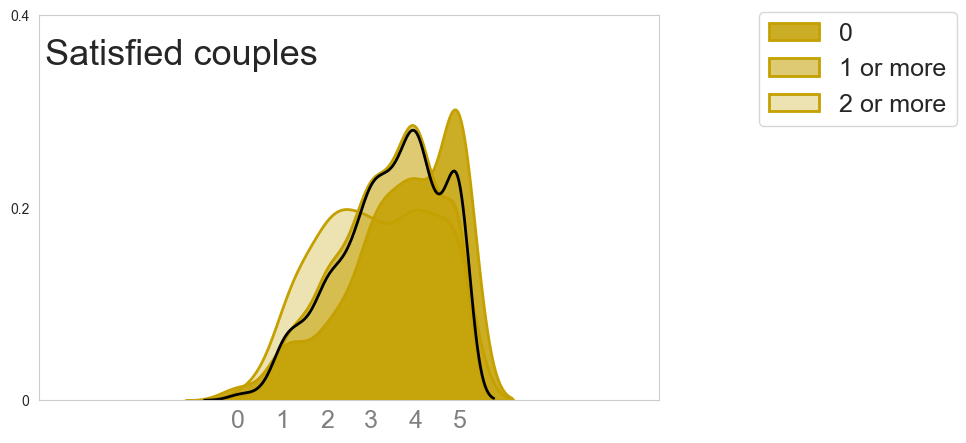

In [44]:
conditions = {
    "0 or more": satisfied[satisfied['TouchDiff'] >= 0],
    "1 or more": satisfied[satisfied['TouchDiff'] >= 1],
    "2 or more": satisfied[satisfied['TouchDiff'] >= 2],
    "3 or more": satisfied[satisfied['TouchDiff'] >= 3],
}
plt.figure(figsize=(8, 5))

shade = [0.15, 0.30, 0.55, 0.85]

for i, (label, subset) in enumerate(conditions.items()):
    ax = sns.kdeplot(
        data=subset,
        x='Frequency',
        # common_norm=True,
        bw_adjust=bw,
        label=label,
        # color='#6B6B6B',
        color=new_palette[0],
        fill=True,
        lw=2,
        alpha=shade[i],
    )

sns.kdeplot(data=satisfied,
            x="Desire",
            # common_norm=True,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )
plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[0, 1, 2, 3, 4, 5],
    color='#808080',
    fontsize=ft_size
)
y_max = ax.get_ylim()[1]  # current y-axis max
half_height = y_max * 1
x = [3, 4]

for i in range(len(x) - 1):
    ax.axvspan(x[i], x[i + 1], ymin=0, ymax=1, color='gray', alpha=0.2)

x_legend = plt.legend(
    labels=["0 or more", "1 or more", "2 or more", "3 or more", "Touch Desire"],
    loc='upper right',
    bbox_to_anchor=(1.5, 1.04),
    fontsize=ft_size
)
current_xlim = ax.get_xlim()
ax.set_xlim(left=-4.5, right=9.5)

y = plt.ylim(0, 0.48)

plt.yticks(ticks=[0, 0.24, 0.48], labels=[0, 0.2, 0.4])
l = plt.ylabel('')
n = plt.xlabel('')
t = plt.title("Satisfied couples", fontsize=tt_size, y=0.85, x=0.01, ha='left')

# plt.savefig('output/img/poster/satisfied_couples8.png', dpi=600, transparent=False, bbox_inches='tight')

In [21]:
target = mixed
target['TouchDiff'] = target['TouchDiff'].apply(val_to_category)
conditions = {
    "0 or more": target[target['TouchDiff'] >= 0],
    "exactly 0": target[target['TouchDiff'] == 0],
    "1 or more": target[target['TouchDiff'] >= 1],
    "2 or more": target[target['TouchDiff'] >= 2],
    "3 or more": target[target['TouchDiff'] >= 3],
}
for i, (label, subset) in enumerate(conditions.items()):
    print(subset.shape)

(660, 53)
(68, 53)
(592, 53)
(162, 53)
(40, 53)


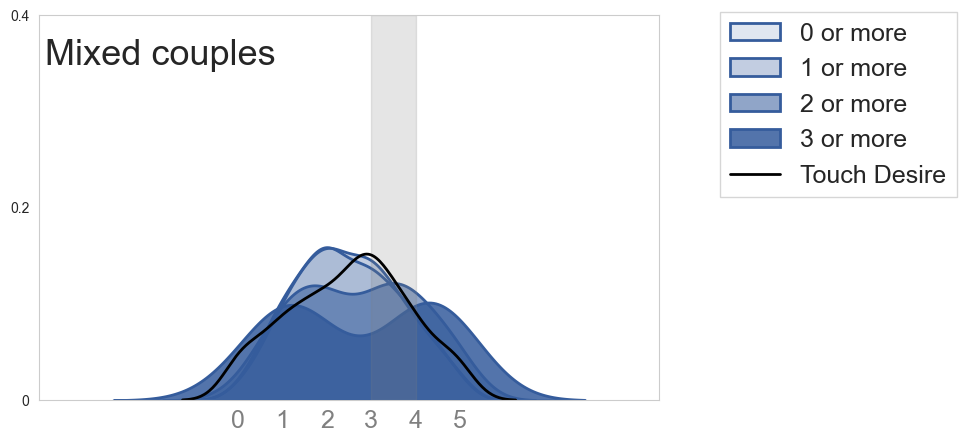

In [22]:
conditions = {
    "0 or more": mixed[mixed['TouchDiff'] >= 0],
    "1 or more": mixed[mixed['TouchDiff'] >= 1],
    "2 or more": mixed[mixed['TouchDiff'] >= 2],
    "3 or more": mixed[mixed['TouchDiff'] >= 3],
}

plt.figure(figsize=(8, 5))

shade = [0.15, 0.30, 0.55, 0.85]

for i, (label, subset) in enumerate(conditions.items()):
    ax = sns.kdeplot(
        data=subset,
        x='Frequency',
        # common_norm=False,
        bw_adjust=bw,
        label=label,
        color=new_palette[1],
        fill=True,
        lw=2,
        alpha=shade[i],

    )

sns.kdeplot(data=mixed,
            x="Desire",
            # common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )

plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[0, 1, 2, 3, 4, 5],
    color='#808080',
    fontsize=ft_size
)
y_max = ax.get_ylim()[1]  # current y-axis max
half_height = y_max * 1
x = [3, 4]
for i in range(len(x) - 1):
    ax.axvspan(x[i], x[i + 1], ymin=0, ymax=1, color='gray', alpha=0.2)

x_legend = plt.legend(
    labels=["0 or more", "1 or more", "2 or more", "3 or more", "Touch Desire"],
    loc='upper right',
    bbox_to_anchor=(1.5, 1.04),
    fontsize=ft_size,
    fancybox=False
)

current_xlim = ax.get_xlim()
ax.set_xlim(left=-4.5, right=9.5)

y = plt.ylim(0, 0.74)

plt.yticks(ticks=[0, 0.37, 0.74], labels=[0, 0.2, 0.4])

l = plt.ylabel('')
n = plt.xlabel('')
t = plt.title("Mixed couples", fontsize=tt_size, y=0.85, x=0.01, ha='left')
# plt.savefig('output/img/poster/mixed_couples8.png', dpi=600, transparent=False, bbox_inches='tight')

In [23]:
target = deprived
target['TouchDiff'] = target['TouchDiff'].apply(val_to_category)
conditions = {
    "0 or more": target[target['TouchDiff'] >= 0],
    "exactly 0": target[target['TouchDiff'] == 0],
    "1 or more": target[target['TouchDiff'] >= 1],
    "2 or more": target[target['TouchDiff'] >= 2],
    "3 or more": target[target['TouchDiff'] >= 3],
}
for i, (label, subset) in enumerate(conditions.items()):
    print(subset.shape)

(3402, 53)
(500, 53)
(2902, 53)
(548, 53)
(124, 53)


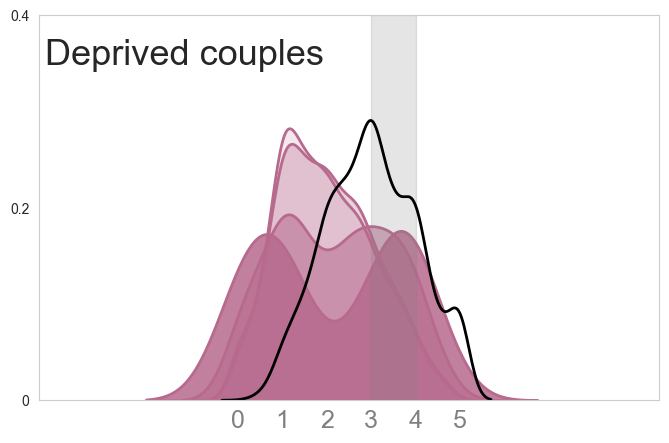

In [24]:
conditions = {
    "0 or more": deprived[deprived['TouchDiff'] >= 0],
    "1 or more": deprived[deprived['TouchDiff'] >= 1],
    "2 or more": deprived[deprived['TouchDiff'] >= 2],
    "3 or more": deprived[deprived['TouchDiff'] >= 3],
}

plt.figure(figsize=(8, 5))

shade = [0.15, 0.30, 0.55, 0.85]

for i, (label, subset) in enumerate(conditions.items()):
    ax = sns.kdeplot(
        data=subset,
        x='Frequency',
        # common_norm=False,
        bw_adjust=bw,
        label=label,
        color=new_palette[2],
        fill=True,
        lw=2,
        alpha=shade[i],
    )

sns.kdeplot(data=deprived,
            x="Desire",
            # common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )
plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    # labels=[
    #     "Not at all",
    #     '1 to 5 times',
    #     '6 to 10 times',
    #     '11 to 20 times',
    #     '21 to 50 times',
    #     'More than 50 times',
    # ],
    labels=[0, 1, 2, 3, 4, 5],
    color='#808080',
    fontsize=ft_size
)
y_max = ax.get_ylim()[1]  # current y-axis max
half_height = y_max * 1
x = [3, 4]
for i in range(len(x) - 1):
    ax.axvspan(x[i], x[i + 1], ymin=0, ymax=1, color='gray', alpha=0.2)

# x_legend = plt.legend(
#     labels=["0 or more", "1 or more", "2 or more", "3 or more", "Wish for Touch"],
#     loc='upper right',
#     bbox_to_anchor=(1.5, 1.04),
#     fontsize=ft_size
# )

current_xlim = ax.get_xlim()
ax.set_xlim(left=-4.5, right=9.5)

y = plt.ylim(0, 0.52)

plt.yticks(ticks=[0, 0.26, 0.52], labels=[0, 0.2, 0.4])

l = plt.ylabel('')
n = plt.xlabel('')
t = plt.title("Deprived couples", fontsize=tt_size, y=0.85, x=0.01, ha='left')
# plt.savefig('output/img/poster/deprived_couples8.png', dpi=600, transparent=False, bbox_inches='tight')

In [25]:
target = deprived_one
target['TouchDiff'] = target['TouchDiff'].apply(val_to_category)
conditions = {
    "0 or more": target[target['TouchDiff'] >= 0],
    "exactly 0": target[target['TouchDiff'] == 0],
    "1 or more": target[target['TouchDiff'] >= 1],
    "2 or more": target[target['TouchDiff'] >= 2],
    "3 or more": target[target['TouchDiff'] >= 3],
}
for i, (label, subset) in enumerate(conditions.items()):
    print(subset.shape)

(4940, 53)
(572, 53)
(4368, 53)
(1206, 53)
(362, 53)


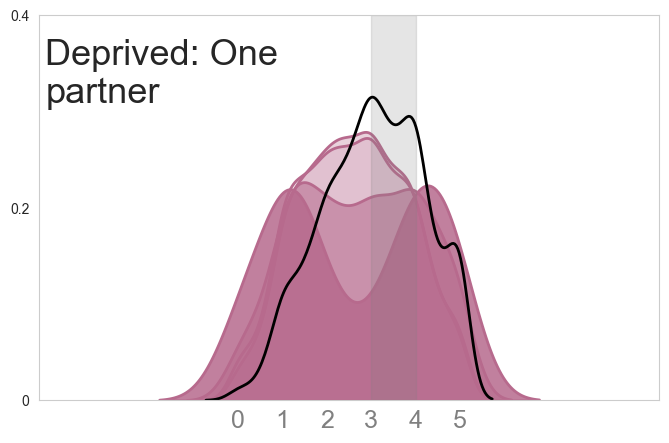

In [26]:
conditions = {
    "0 or more": deprived_one[deprived_one['TouchDiff'] >= 0],
    "1 or more": deprived_one[deprived_one['TouchDiff'] >= 1],
    "2 or more": deprived_one[deprived_one['TouchDiff'] >= 2],
    "3 or more": deprived_one[deprived_one['TouchDiff'] >= 3],
}

plt.figure(figsize=(8, 5))

shade = [0.15, 0.30, 0.55, 0.85]

for i, (label, subset) in enumerate(conditions.items()):
    ax = sns.kdeplot(
        data=subset,
        x='Frequency',
        # common_norm=False,
        bw_adjust=bw,
        label=label,
        color=new_palette[2],
        fill=True,
        lw=2,
        alpha=shade[i],
    )

sns.kdeplot(data=deprived_one,
            x="Desire",
            # common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )
plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[0, 1, 2, 3, 4, 5],
    color='#808080',
    fontsize=ft_size
)

x = [3, 4]
for i in range(len(x) - 1):
    ax.axvspan(x[i], x[i + 1], ymin=0, ymax=1, color='gray', alpha=0.2)
#
# x_legend = plt.legend(
#     labels=["0 or more", "1 or more", "2 or more", "3 or more", "Wish for Touch"],
#     loc='upper right',
#     bbox_to_anchor=(1.5, 1.04),
#     fontsize=ft_size
# )

current_xlim = ax.get_xlim()
ax.set_xlim(left=-4.5, right=9.5)

y = plt.ylim(0, 0.4)
plt.yticks(ticks=[0, 0.2, 0.4], labels=[0, 0.2, 0.4])

l = plt.ylabel('')
n = plt.xlabel('')
t = plt.title("Deprived: One \npartner", fontsize=tt_size, y=0.75, x=0.01, ha='left')
# plt.savefig('output/img/poster/deprived_one8.png', dpi=600, transparent=False, bbox_inches='tight')

In [27]:
target = deprived_me
target['TouchDiff'] = target['TouchDiff'].apply(val_to_category)
conditions = {
    "0 or more": target[target['TouchDiff'] >= 0],
    "exactly 0": target[target['TouchDiff'] == 0],
    "1 or more": target[target['TouchDiff'] >= 1],
    "2 or more": target[target['TouchDiff'] >= 2],
    "3 or more": target[target['TouchDiff'] >= 3],
}
for i, (label, subset) in enumerate(conditions.items()):
    print(subset.shape)

(2084, 53)
(234, 53)
(1850, 53)
(490, 53)
(170, 53)


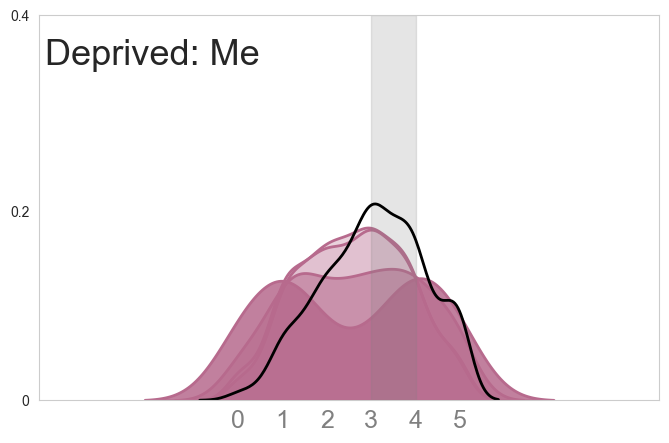

In [28]:
conditions = {
    "0 or more": deprived_me[deprived_me['TouchDiff'] >= 0],
    "1 or more": deprived_me[deprived_me['TouchDiff'] >= 1],
    "2 or more": deprived_me[deprived_me['TouchDiff'] >= 2],
    "3 or more": deprived_me[deprived_me['TouchDiff'] >= 3],
}

plt.figure(figsize=(8, 5))

shade = [0.15, 0.30, 0.55, 0.85]

for i, (label, subset) in enumerate(conditions.items()):
    ax = sns.kdeplot(
        data=subset,
        x='Frequency',
        # common_norm=False,
        bw_adjust=bw,
        label=label,
        color=new_palette[2],
        fill=True,
        lw=2,
        alpha=shade[i],
    )

sns.kdeplot(data=deprived_me,
            x="Desire",
            # common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )
plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[0, 1, 2, 3, 4, 5],
    color='#808080',
    fontsize=ft_size
)

x = [3, 4]
for i in range(len(x) - 1):
    ax.axvspan(x[i], x[i + 1], ymin=0, ymax=1, color='gray', alpha=0.2)
#
# x_legend = plt.legend(
#     labels=["0 or more", "1 or more", "2 or more", "3 or more", "Wish for Touch"],
#     loc='upper right',
#     bbox_to_anchor=(1.5, 1.04),
#     fontsize=ft_size
# )

current_xlim = ax.get_xlim()
ax.set_xlim(left=-4.5, right=9.5)

y = plt.ylim(0, 0.63)
plt.yticks(ticks=[0, 0.31, 0.63], labels=[0, 0.2, 0.4])

l = plt.ylabel('')
n = plt.xlabel('')
t = plt.title("Deprived: Me", fontsize=tt_size, y=0.85, x=0.01, ha='left')
# plt.savefig('output/img/poster/deprived_me8.png', dpi=600, transparent=False, bbox_inches='tight')

In [29]:
target = deprived_partner
target['TouchDiff'] = target['TouchDiff'].apply(val_to_category)
conditions = {
    "0 or more": target[target['TouchDiff'] >= 0],
    "exactly 0": target[target['TouchDiff'] == 0],
    "1 or more": target[target['TouchDiff'] >= 1],
    "2 or more": target[target['TouchDiff'] >= 2],
    "3 or more": target[target['TouchDiff'] >= 3],
}
for i, (label, subset) in enumerate(conditions.items()):
    print(subset.shape)

(2856, 53)
(338, 53)
(2518, 53)
(716, 53)
(192, 53)


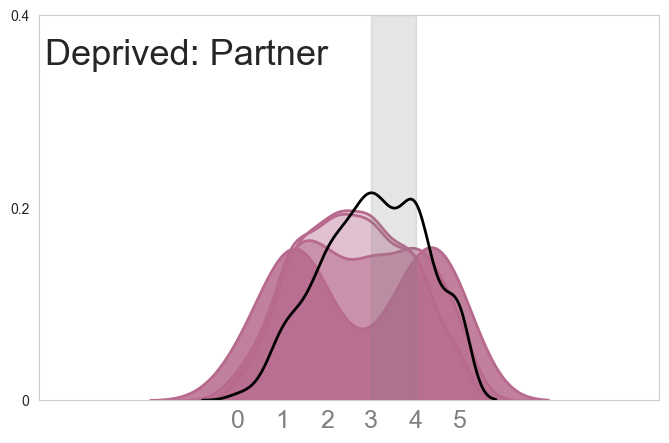

In [30]:
conditions = {
    "0 or more": deprived_partner[deprived_partner['TouchDiff'] >= 0],
    "1 or more": deprived_partner[deprived_partner['TouchDiff'] >= 1],
    "2 or more": deprived_partner[deprived_partner['TouchDiff'] >= 2],
    "3 or more": deprived_partner[deprived_partner['TouchDiff'] >= 3],
}

plt.figure(figsize=(8, 5))

shade = [0.15, 0.30, 0.55, 0.85]

for i, (label, subset) in enumerate(conditions.items()):
    ax = sns.kdeplot(
        data=subset,
        x='Frequency',
        # common_norm=False,
        bw_adjust=bw,
        label=label,
        color=new_palette[2],
        fill=True,
        lw=2,
        alpha=shade[i],
    )

sns.kdeplot(data=deprived_partner,
            x="Desire",
            # common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )
plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[0, 1, 2, 3, 4, 5],
    color='#808080',
    fontsize=ft_size
)
x = [3, 4]
for i in range(len(x) - 1):
    ax.axvspan(x[i], x[i + 1], ymin=0, ymax=1, color='gray', alpha=0.2)

# x_legend = plt.legend(
#     labels=["0 or more", "1 or more", "2 or more", "3 or more", "Wish for Touch"],
#     loc='upper right',
#     bbox_to_anchor=(1.5, 1.04),
#     fontsize=ft_size
# )

current_xlim = ax.get_xlim()
ax.set_xlim(left=-4.5, right=9.5)

y = plt.ylim(0, 0.56)
plt.yticks(ticks=[0, 0.28, 0.56], labels=[0, 0.2, 0.4])

l = plt.ylabel('')
n = plt.xlabel('')
t = plt.title("Deprived: Partner", fontsize=tt_size, y=0.85, x=0.01, ha='left')
# plt.savefig('output/img/poster/deprived_partner8.png', dpi=600, transparent=False, bbox_inches='tight')


In [31]:
target = saturated
target['TouchDiff'] = target['TouchDiff'].apply(val_to_category)
conditions = {
    "0 or more": target[target['TouchDiff'] >= 0],
    "exactly 0": target[target['TouchDiff'] == 0],
    "1 or more": target[target['TouchDiff'] >= 1],
    "2 or more": target[target['TouchDiff'] >= 2],
    "3 or more": target[target['TouchDiff'] >= 3],
}
for i, (label, subset) in enumerate(conditions.items()):
    print(subset.shape)

(90, 53)
(14, 53)
(76, 53)
(12, 53)
(0, 53)


C:\Users\silva\AppData\Local\Temp\ipykernel_36448\2379820251.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(


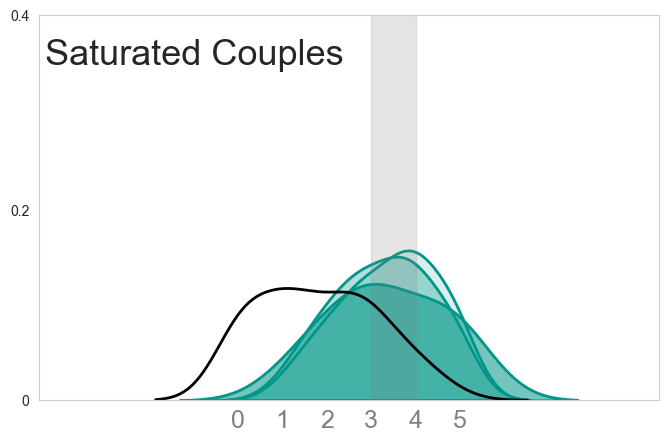

In [32]:
conditions = {
    "0 or more": saturated[saturated['TouchDiff'] >= 0],
    "1 or more": saturated[saturated['TouchDiff'] >= 1],
    "2 or more": saturated[saturated['TouchDiff'] >= 2],
    "3 or more": saturated[saturated['TouchDiff'] >= 3],
}

plt.figure(figsize=(8, 5))

shade = [0.15, 0.30, 0.55, 0.85]

for i, (label, subset) in enumerate(conditions.items()):
    ax = sns.kdeplot(
        data=subset,
        x='Frequency',
        # common_norm=False,
        bw_adjust=bw,
        label=label,
        color=new_palette[3],
        fill=True,
        lw=2,
        alpha=shade[i],
    )

sns.kdeplot(data=saturated,
            x="Desire",
            # common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )
plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[0, 1, 2, 3, 4, 5],
    color='#808080',
    fontsize=ft_size
)

x = [3, 4]
for i in range(len(x) - 1):
    ax.axvspan(x[i], x[i + 1], ymin=0, ymax=1, color='gray', alpha=0.2)

# x_legend = plt.legend(
#     labels=["0 or more", "1 or more", "2 or more", "3 or more", "Wish for Touch"],
#     loc='upper right',
#     bbox_to_anchor=(1.5, 1.04),
#     fontsize=ft_size
# )
current_xlim = ax.get_xlim()
ax.set_xlim(left=-4.5, right=9.5)

y = plt.ylim(0, 0.79)
plt.yticks(ticks=[0, 0.39, 0.79], labels=[0, 0.2, 0.4])

l = plt.ylabel('')
n = plt.xlabel('')
t = plt.title("Saturated Couples", fontsize=tt_size, y=0.85, x=0.01, ha='left')
# plt.savefig('output/img/poster/saturated_couples8.png', dpi=600, transparent=False, bbox_inches='tight')

In [33]:
target = saturated_one
target['TouchDiff'] = target['TouchDiff'].apply(val_to_category)
conditions = {
    "0 or more": target[target['TouchDiff'] >= 0],
    "exactly 0": target[target['TouchDiff'] == 0],
    "1 or more": target[target['TouchDiff'] >= 1],
    "2 or more": target[target['TouchDiff'] >= 2],
    "3 or more": target[target['TouchDiff'] >= 3],
}
for i, (label, subset) in enumerate(conditions.items()):
    print(subset.shape)

(666, 53)
(80, 53)
(586, 53)
(156, 53)
(38, 53)


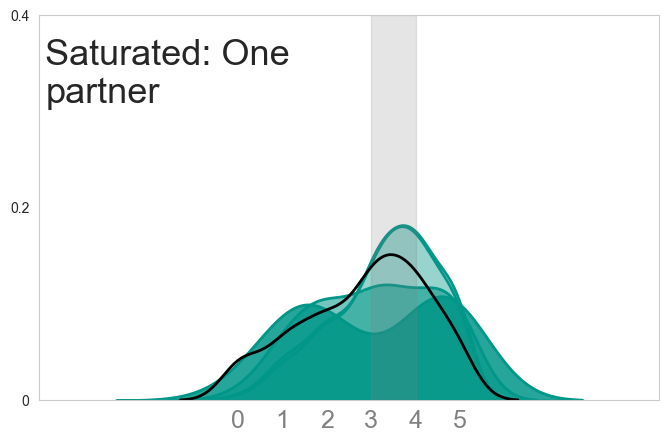

In [34]:
conditions = {
    "0 or more": saturated_one[saturated_one['TouchDiff'] >= 0],
    "1 or more": saturated_one[saturated_one['TouchDiff'] >= 1],
    "2 or more": saturated_one[saturated_one['TouchDiff'] >= 2],
    "3 or more": saturated_one[saturated_one['TouchDiff'] >= 3],
}

plt.figure(figsize=(8, 5))

shade = [0.15, 0.30, 0.55, 0.85]

for i, (label, subset) in enumerate(conditions.items()):
    ax = sns.kdeplot(
        data=subset,
        x='Frequency',
        # common_norm=False,
        bw_adjust=bw,
        label=label,
        color=new_palette[3],
        fill=True,
        lw=2,
        alpha=shade[i],
    )

sns.kdeplot(data=saturated_one,
            x="Desire",
            # common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )
plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[0, 1, 2, 3, 4, 5],
    color='#808080',
    fontsize=ft_size
)

x = [3, 4]
for i in range(len(x) - 1):
    ax.axvspan(x[i], x[i + 1], ymin=0, ymax=1, color='gray', alpha=0.2)

# x_legend = plt.legend(
#     labels=["0 or more", "1 or more", "2 or more", "3 or more", "Wish for Touch"],
#     loc='upper right',
#     bbox_to_anchor=(1.5, 1.04),
#     fontsize=ft_size
# )

current_xlim = ax.get_xlim()
ax.set_xlim(left=-4.5, right=9.5)

y = plt.ylim(0, 0.74)
plt.yticks(ticks=[0, 0.37, 0.74], labels=[0, 0.2, 0.4])

l = plt.ylabel('')
n = plt.xlabel('')
t = plt.title("Saturated: One \npartner", fontsize=tt_size, y=0.75, x=0.01, ha='left')
# plt.savefig('output/img/poster/saturated_one8.png', dpi=600, transparent=False, bbox_inches='tight')

In [35]:
target = saturated_me
target['TouchDiff'] = target['TouchDiff'].apply(val_to_category)
conditions = {
    "0 or more": target[target['TouchDiff'] >= 0],
    "exactly 0": target[target['TouchDiff'] == 0],
    "1 or more": target[target['TouchDiff'] >= 1],
    "2 or more": target[target['TouchDiff'] >= 2],
    "3 or more": target[target['TouchDiff'] >= 3],
}
for i, (label, subset) in enumerate(conditions.items()):
    print(subset.shape)

(284, 53)
(40, 53)
(244, 53)
(68, 53)
(14, 53)


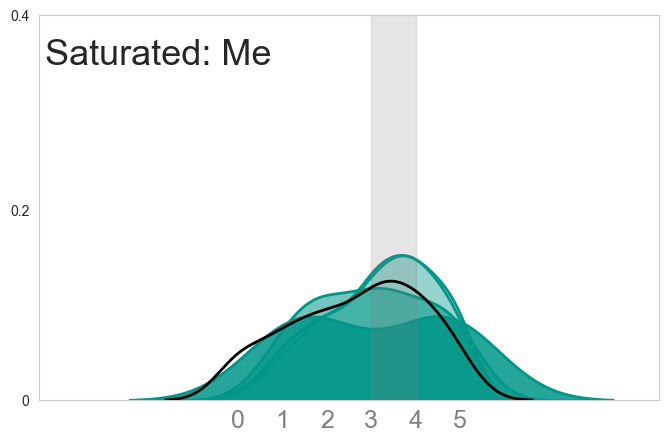

In [36]:
conditions = {
    "0 or more": saturated_me[saturated_me['TouchDiff'] >= 0],
    "1 or more": saturated_me[saturated_me['TouchDiff'] >= 1],
    "2 or more": saturated_me[saturated_me['TouchDiff'] >= 2],
    "3 or more": saturated_me[saturated_me['TouchDiff'] >= 3],
}

plt.figure(figsize=(8, 5))

shade = [0.15, 0.30, 0.55, 0.85]

for i, (label, subset) in enumerate(conditions.items()):
    ax = sns.kdeplot(
        data=subset,
        x='Frequency',
        # common_norm=False,
        bw_adjust=bw,
        label=label,
        color=new_palette[3],
        fill=True,
        lw=2,
        alpha=shade[i],
    )

sns.kdeplot(data=saturated_me,
            x="Desire",
            # common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )
plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[0, 1, 2, 3, 4, 5],
    color='#808080',
    fontsize=ft_size
)

x = [3, 4]
for i in range(len(x) - 1):
    ax.axvspan(x[i], x[i + 1], ymin=0, ymax=1, color='gray', alpha=0.2)

# x_legend = plt.legend(
#     labels=["0 or more", "1 or more", "2 or more", "3 or more", "Wish for Touch"],
#     loc='upper right',
#     bbox_to_anchor=(1.5, 1.04),
#     fontsize=ft_size
# )

current_xlim = ax.get_xlim()
ax.set_xlim(left=-4.5, right=9.5)

y = plt.ylim(0, 0.77)
plt.yticks(ticks=[0, 0.38, 0.77], labels=[0, 0.2, 0.4])

l = plt.ylabel('')
n = plt.xlabel('')
t = plt.title("Saturated: Me", fontsize=tt_size, y=0.85, x=0.01, ha='left')
# plt.savefig('output/img/poster/saturated_me8.png', dpi=600, transparent=False, bbox_inches='tight')

In [37]:
target = saturated_partner
target['TouchDiff'] = target['TouchDiff'].apply(val_to_category)
conditions = {
    "0 or more": target[target['TouchDiff'] >= 0],
    "exactly 0": target[target['TouchDiff'] == 0],
    "1 or more": target[target['TouchDiff'] >= 1],
    "2 or more": target[target['TouchDiff'] >= 2],
    "3 or more": target[target['TouchDiff'] >= 3],
}
for i, (label, subset) in enumerate(conditions.items()):
    print(subset.shape)

(382, 53)
(40, 53)
(342, 53)
(88, 53)
(24, 53)


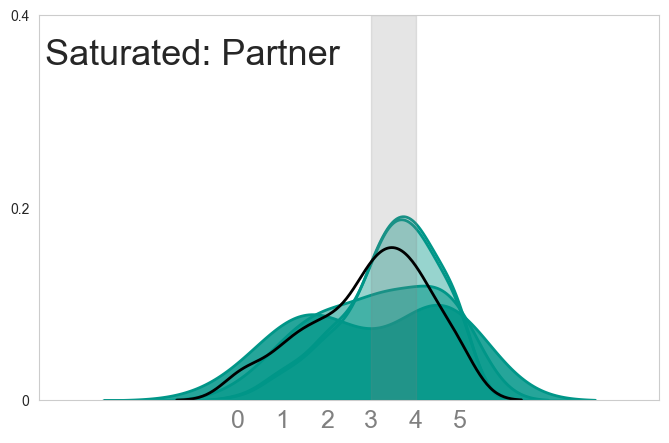

In [38]:
conditions = {
    "0 or more": saturated_partner[saturated_partner['TouchDiff'] >= 0],
    "1 or more": saturated_partner[saturated_partner['TouchDiff'] >= 1],
    "2 or more": saturated_partner[saturated_partner['TouchDiff'] >= 2],
    "3 or more": saturated_partner[saturated_partner['TouchDiff'] >= 3],
}

plt.figure(figsize=(8, 5))

shade = [0.15, 0.30, 0.55, 0.85]

for i, (label, subset) in enumerate(conditions.items()):
    ax = sns.kdeplot(
        data=subset,
        x='Frequency',
        # common_norm=False,
        bw_adjust=bw,
        label=label,
        color=new_palette[3],
        fill=True,
        lw=2,
        alpha=shade[i],
    )

sns.kdeplot(data=saturated_partner,
            x="Desire",
            # common_norm=False,
            bw_adjust=bw,
            fill=False,
            color="k",
            lw=2,
            )
plt.grid(False)

x_ticks = plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[0, 1, 2, 3, 4, 5],
    color='#808080',
    fontsize=ft_size
)

x = [3, 4]
for i in range(len(x) - 1):
    ax.axvspan(x[i], x[i + 1], ymin=0, ymax=1, color='gray', alpha=0.2)

# x_legend = plt.legend(
#     labels=["0 or more", "1 or more", "2 or more", "3 or more", "Wish for Touch"],
#     loc='upper right',
#     bbox_to_anchor=(1.5, 1.04),
#     fontsize=ft_size
# )

current_xlim = ax.get_xlim()
ax.set_xlim(left=-4.5, right=9.5)

y = plt.ylim(0, 0.76)
plt.yticks(ticks=[0, 0.38, 0.76], labels=[0, 0.2, 0.4])

l = plt.ylabel('')
n = plt.xlabel('')
t = plt.title("Saturated: Partner", fontsize=tt_size, y=0.85, x=0.01, ha='left')
# plt.savefig('output/img/poster/saturated_partner8.png', dpi=600, transparent=False, bbox_inches='tight')